In [1]:
%pip install pandas matplotlib seaborn statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import os
import sys

In [3]:
# --- Set up the environment ---
test_filename = os.path.join(os.getcwd(), 'ds04/assets/Test_knight.csv')
train_filename = os.path.join(os.getcwd(), 'ds04/assets/Train_knight.csv')

In [4]:
# --- Load the data to pandas dataframes ---
test_df = pd.read_csv(test_filename)
train_df = pd.read_csv(train_filename)
train_df.set_index('knight')
train_df.head(3)

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.1726,0.1449,0.05356,0.2779,0.08121,Sith
1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.3150,0.5372,0.23880,0.2768,0.07615,Jedi
2,10.97,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.4082,0.4779,0.15550,0.2540,0.09532,Sith


In [5]:
# --- Separate features and label ---
le = LabelEncoder()
X = train_df.drop(columns=['knight'])
y = train_df['knight']
y_encoded = le.fit_transform(y)  # 'Jedi' → 1, 'Sith' → 0 automatically

# --- set up the train validation and test ---
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_test = test_df.copy()

In [15]:
# --- Train model ---
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_val_pred = model.predict(X_val)
f1 = f1_score(y_val, y_val_pred)
print(classification_report(y_val, y_val_pred, target_names=['Jedi', 'Sith']))


              precision    recall  f1-score   support

        Jedi       1.00      1.00      1.00        33
        Sith       1.00      1.00      1.00        47

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



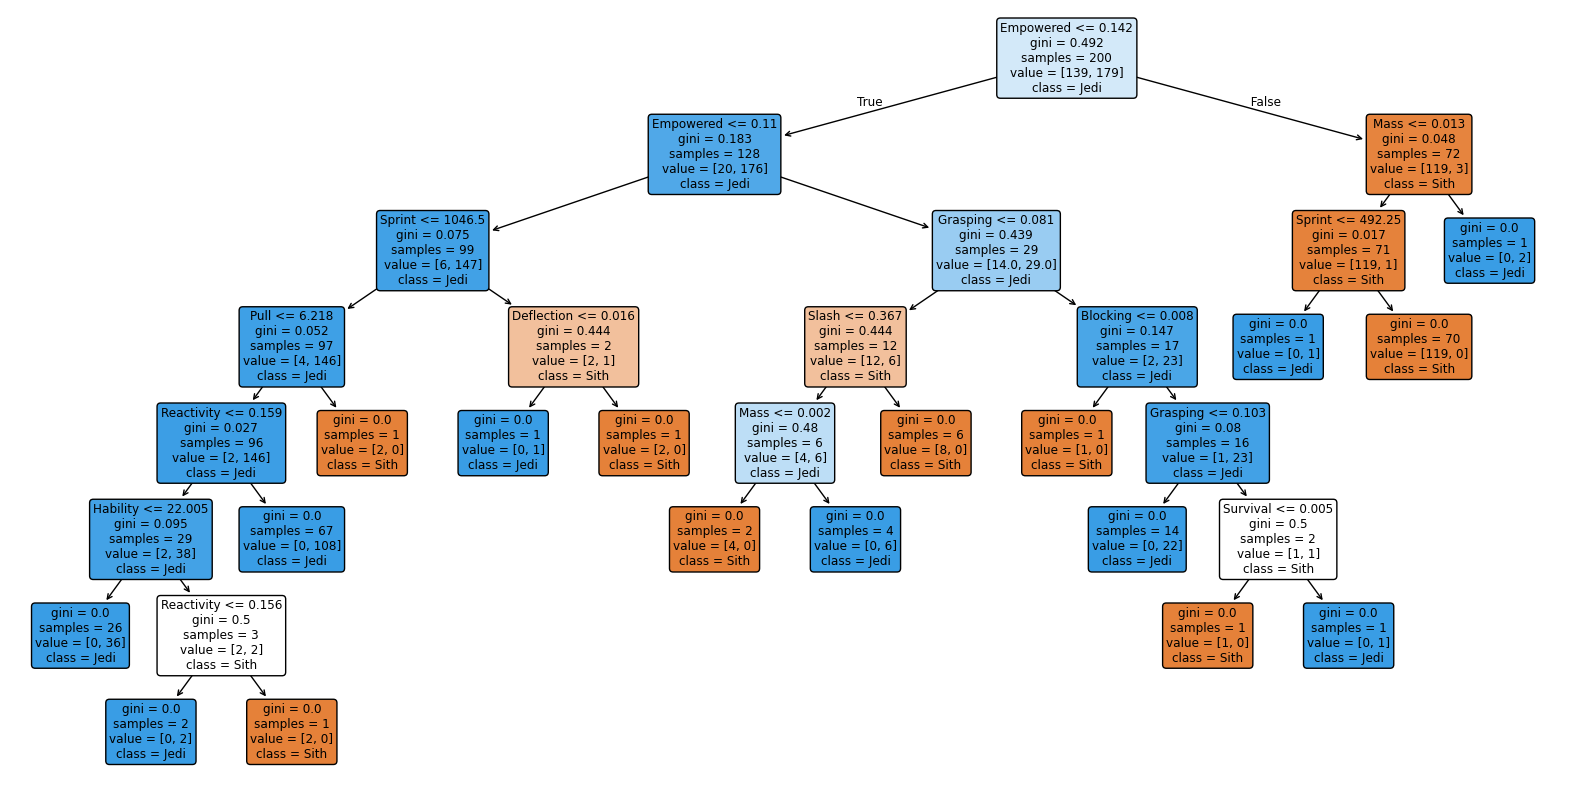

In [7]:
""" Visualize the model """
tree = model.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=y, filled=True, rounded=True)
plt.show()

In [ ]:
# --- Predict on test set ---
y_test_pred = model.predict(test_df)
labels = le.inverse_transform(y_test_pred)  # Converts 1 → 'Jedi', 0 → 'Sith' y_test_pred
labels[:5]

array(['Jedi', 'Jedi', 'Jedi'], dtype=object)

In [12]:
# --- Export to Tree.txt ---
dir = os.path.join(os.getcwd(), 'ds04/ex04')
filename = os.path.join(dir, 'Tree.txt')
with open(filename, 'w') as f:
    for label in labels:
        f.write(label + '\n')